In [1]:
#pip install pandas sqlite3 requests


Paso 3: Descargar los datos usando la librería requests



In [2]:
import requests

# Realizar la solicitud GET a la página web
url = 'https://www.worldometers.info/population/countries-in-europe-by-population/'
response = requests.get(url)

# Verificar el estado de la respuesta
if response.status_code == 200:
    # Obtener el contenido HTML de la página
    html_content = response.content
else:
    print('Error al obtener el contenido de la página web.')

Paso 4: Analizar los datos HTML con BeautifulSoup



In [3]:
from bs4 import BeautifulSoup

# Crear un objeto BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Encontrar la tabla que contiene los datos
table = soup.find('table')

# Extraer los datos de la tabla
data = []
rows = table.find_all('tr')
for row in rows:
    columns = row.find_all('td')
    row_data = [column.text.strip() for column in columns]
    data.append(row_data)

# Imprimir los datos extraídos
for row in data:
    print(row)

[]
['1', 'Russia', '145,934,462', '0.04 %', '62,206', '9', '16,376,870', '182,456', '1.8', '40', '74 %', '1.87 %']
['2', 'Germany', '83,783,942', '0.32 %', '266,897', '240', '348,560', '543,822', '1.6', '46', '76 %', '1.07 %']
['3', 'United Kingdom', '67,886,011', '0.53 %', '355,839', '281', '241,930', '260,650', '1.8', '40', '83 %', '0.87 %']
['4', 'France', '65,273,511', '0.22 %', '143,783', '119', '547,557', '36,527', '1.9', '42', '82 %', '0.84 %']
['5', 'Italy', '60,461,826', '-0.15 %', '-88,249', '206', '294,140', '148,943', '1.3', '47', '69 %', '0.78 %']
['6', 'Spain', '46,754,778', '0.04 %', '18,002', '94', '498,800', '40,000', '1.3', '45', '80 %', '0.60 %']
['7', 'Ukraine', '43,733,762', '-0.59 %', '-259,876', '75', '579,320', '10,000', '1.4', '41', '69 %', '0.56 %']
['8', 'Poland', '37,846,611', '-0.11 %', '-41,157', '124', '306,230', '-29,395', '1.4', '42', '60 %', '0.49 %']
['9', 'Romania', '19,237,691', '-0.66 %', '-126,866', '84', '230,170', '-73,999', '1.6', '43', '55 %',

Paso 5: Limpiar filas



In [17]:
# Eliminar filas con valores NaN
data = [row for row in data if all(row)]

# Imprimir la tabla limpia
for row in data:
    print(row)

[]
['1', 'Russia', '145,934,462', '0.04 %', '62,206', '9', '16,376,870', '182,456', '1.8', '40', '74 %', '1.87 %']
['2', 'Germany', '83,783,942', '0.32 %', '266,897', '240', '348,560', '543,822', '1.6', '46', '76 %', '1.07 %']
['3', 'United Kingdom', '67,886,011', '0.53 %', '355,839', '281', '241,930', '260,650', '1.8', '40', '83 %', '0.87 %']
['4', 'France', '65,273,511', '0.22 %', '143,783', '119', '547,557', '36,527', '1.9', '42', '82 %', '0.84 %']
['5', 'Italy', '60,461,826', '-0.15 %', '-88,249', '206', '294,140', '148,943', '1.3', '47', '69 %', '0.78 %']
['6', 'Spain', '46,754,778', '0.04 %', '18,002', '94', '498,800', '40,000', '1.3', '45', '80 %', '0.60 %']
['7', 'Ukraine', '43,733,762', '-0.59 %', '-259,876', '75', '579,320', '10,000', '1.4', '41', '69 %', '0.56 %']
['8', 'Poland', '37,846,611', '-0.11 %', '-41,157', '124', '306,230', '-29,395', '1.4', '42', '60 %', '0.49 %']
['9', 'Romania', '19,237,691', '-0.66 %', '-126,866', '84', '230,170', '-73,999', '1.6', '43', '55 %',

Paso 6: Insertar los datos en SQLite



In [18]:
import sqlite3

# Crear una conexión a la base de datos SQLite
conn = sqlite3.connect('population.db')

# Insertar los datos en la tabla 'population'
df.to_sql('population', conn, if_exists='replace', index=False)

# Cerrar la conexión a la base de datos
conn.close()

Paso 7: Conectarse a SQLite



In [19]:
import sqlite3

# Conectarse a la base de datos SQLite
conn = sqlite3.connect('population.db')

Paso 8: Crear una tabla en la base de datos



In [20]:
# Crear la tabla 'population' en la base de datos
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS population (
        Country TEXT,
        Population TEXT,
        Yearly_Change TEXT,
        Net_Change TEXT,
        Density TEXT,
        Land_Area TEXT,
        Migrants TEXT,
        Fert_Rate TEXT,
        Med_Age TEXT,
        Urban_Pop TEXT,
        World_Share TEXT
    )
''')

# Guardar los cambios en la base de datos
conn.commit()

Paso 9: Recuperar los datos de la base de datos



In [21]:
import pandas as pd

# Recuperar los datos de la tabla 'population'
query = 'SELECT * FROM population'
df = pd.read_sql_query(query, conn)

# Imprimir el DataFrame con los datos recuperados
print(df)

     #   Country (or dependency)  Population Yearly Change  Net Change  \
0    1                    Russia   145934462        0.04 %       62206   
1    2                   Germany    83783942        0.32 %      266897   
2    3            United Kingdom    67886011        0.53 %      355839   
3    4                    France    65273511        0.22 %      143783   
4    5                     Italy    60461826       -0.15 %      -88249   
5    6                     Spain    46754778        0.04 %       18002   
6    7                   Ukraine    43733762       -0.59 %     -259876   
7    8                    Poland    37846611       -0.11 %      -41157   
8    9                   Romania    19237691       -0.66 %     -126866   
9   10               Netherlands    17134872        0.22 %       37742   
10  11                   Belgium    11589623        0.44 %       50295   
11  12  Czech Republic (Czechia)    10708981        0.18 %       19772   
12  13                    Greece    10

Paso 10: Crear una visualización



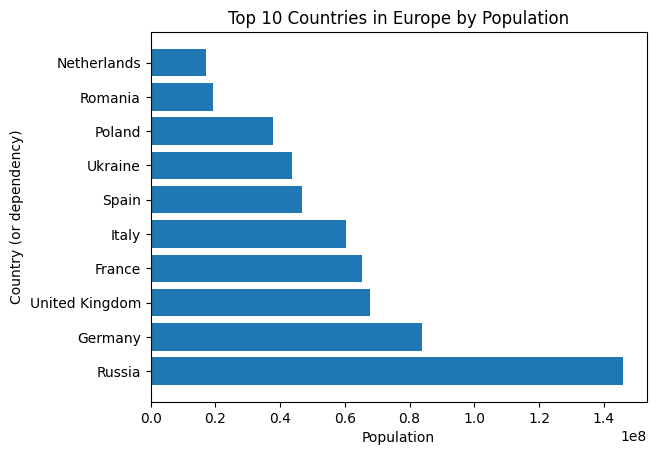

In [22]:
import matplotlib.pyplot as plt

# Renombrar la columna 'Population (2020)' a 'Population'
df = df.rename(columns={'Population (2020)': 'Population'})

# Ordenar el DataFrame por la columna 'Population'
df = df.sort_values('Population', ascending=False)

# Obtener los 10 países con mayor población
top_10_countries = df.head(10)

# Crear el gráfico de barras
plt.barh(top_10_countries['Country (or dependency)'], top_10_countries['Population'])
plt.xlabel('Population')
plt.ylabel('Country (or dependency)')
plt.title('Top 10 Countries in Europe by Population')
plt.show()